# Air Quality Dataset

First of all, import your libraries and load your dataset

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("air_quality.csv") #For example

df_num = df.drop(columns=["Date", "City"])

print(df.head())

         Date    City      PM2.5         AQI  Temperature   Humidity  \
0  10/10/2024  City A  16.144166   61.741312    27.764299  49.748057   
1  11/10/2024  City B  46.138606  148.297844    26.874751  49.518670   
2  12/10/2024  City A  44.448191  135.667536    17.960423  59.709283   
3  13/10/2024  City A  33.355478  101.828243    21.308115  57.367290   
4  14/10/2024  City A  26.530468   68.065751    20.060733  71.750182   

   Wind Speed  
0    5.330389  
1    6.137873  
2    3.250387  
3    4.199254  
4    6.018756  


# Test for Normality
Create a Q-Q Plot, Histogram or KDE for PM2.5 and AQI, then run a Shapiro Wilk test

In [2]:
for i in df_num.columns:
    # You fill in the rest!
    shapiro_stat, shapiro_p = stats.shapiro(df_num[i])

    print(i,f"\nstat: {shapiro_stat}\n",
      f"p: {shapiro_p}")
    if shapiro_p <= 0.05:
      print("Result is statistically significant\nReject the null hypothesis\n")
    else:
      print("Result is not statistically significant\nAccept the null hypothesis\n")


PM2.5 
stat: 0.9880513662932278
 p: 0.588276771378551
Result is not statistically significant
Accept the null hypothesis

AQI 
stat: 0.9950092220455463
 p: 0.984166999432517
Result is not statistically significant
Accept the null hypothesis

Temperature 
stat: 0.9910842844584893
 p: 0.8075485602855733
Result is not statistically significant
Accept the null hypothesis

Humidity 
stat: 0.9852143248804929
 p: 0.402548221915634
Result is not statistically significant
Accept the null hypothesis

Wind Speed 
stat: 0.9911976409708718
 p: 0.815172438149923
Result is not statistically significant
Accept the null hypothesis



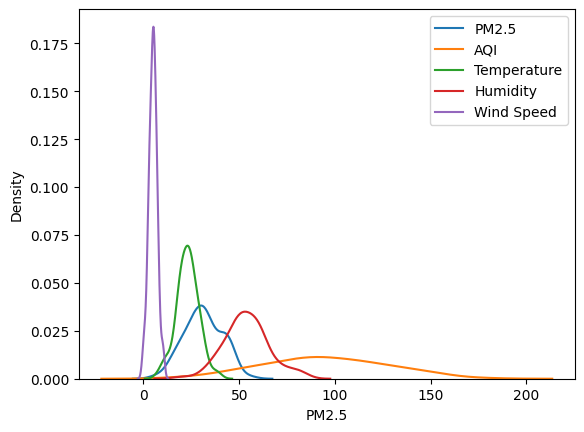

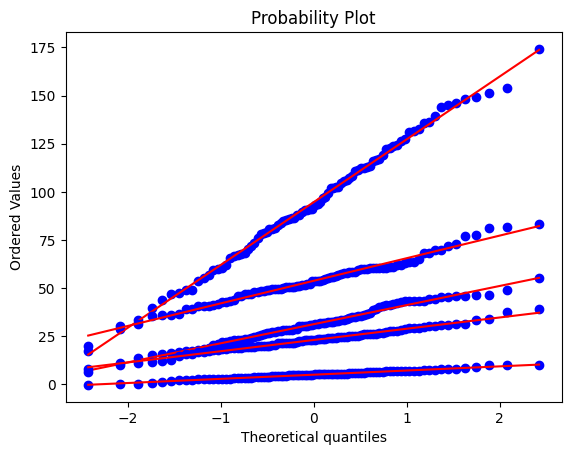

In [3]:
for i in df_num.columns:
    sns.kdeplot(data=df_num[i], label=i)
plt.legend()
plt.show()


for i in df_num.columns:
    stats.probplot(df_num[i], dist="norm", plot=plt)
plt.show()


# Hypothesis Testing

Split the City data into City A and City B, then perform a T Tests, What is your null hypothesis? Write it out as an if statement.



null hypothesis: The AQI in both cities will be the same


In [4]:
city_a_aqi = df[df["City"] == "City A"]["AQI"]
city_b_aqi = df[df["City"] == "City B"]["AQI"]

<Axes: xlabel='AQI', ylabel='Density'>

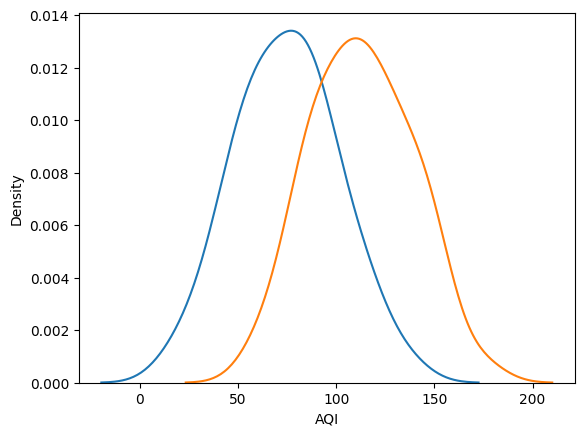

In [5]:
sns.kdeplot(city_a_aqi)
sns.kdeplot(city_b_aqi)

In [6]:
tstat, pval = stats.ttest_ind(city_a_aqi, city_b_aqi)

print(f"tstat: {tstat}\n",
      f"pval: {pval}")

tstat: -7.016060200809159
 pval: 4.4978562023310553e-10


In [7]:

if pval <= 0.05:
    print("Result is statistically significant\nReject the null hypothesis\n")
else:
    print("Result is not statistically significant\nAccept the null hypothesis\n")

Result is statistically significant
Reject the null hypothesis



# Correlation Analysis

Calculate Pearson and Spearman correlation for Temperature vs. AQI

Interpret the correlation coefficient and then create a Scatter Plot

# Pearson Correlation Test
Assumptions:

The data is continuous and normally distributed

Linear relationship

No significant outliers


In [26]:
pearsonr, p_value = stats.pearsonr(df["Temperature"], df["AQI"])

print(f"pearsonr: {pearsonr}\n      pval={p_value}")


pearsonr: 0.10668792382606508
      pval=0.31690295883297254


# Spearman Correlation Test

Assumptions:

Monotonic relationship

Variables can be ordinal or continuous

Robust to outliers and non-normal data


In [27]:
spearman_r, pval = stats.spearmanr(df["Temperature"], df["AQI"])
print(f"spearmanr: {spearman_r}\n      pval:{pval}")


spearmanr: 0.12593324278717538
      pval:0.23691900515562425


<Axes: xlabel='Temperature', ylabel='AQI'>

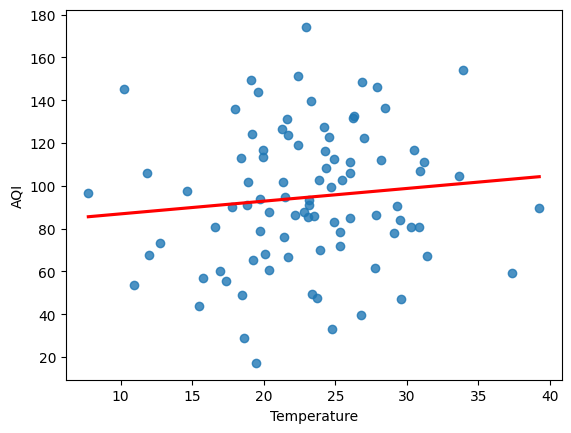

In [10]:
sns.regplot(data=df, x="Temperature", y="AQI", ci=False, line_kws={'color':'red'})


# Kendall’s Tau Correlation Test

Assumptions:

Measures ordinal association

Robust for small sample sizes

Less sensitive to outliers

In [11]:
tau, pval = stats.kendalltau(df["Temperature"], df["AQI"])
print(f"tau: {tau}\n      pval:{pval}")


tau: 0.08364544319600499
      pval:0.24298458639502019


spearman r: 0.12593324278717538
      pval:0.23691900515562425


<Axes: >

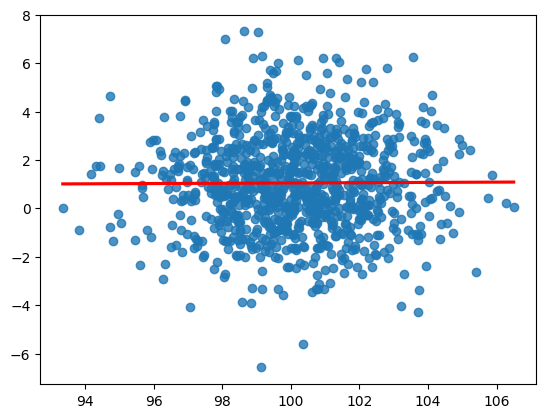

In [33]:
random_data_x = np.random.normal(100, 2, 1000)
random_data_y = np.random.normal(1, 2, 1000)
spearman_r, pval = stats.spearmanr(df["Temperature"], df["AQI"])
print(f"spearman r: {spearman_r}\n      pval:{pval}")
sns.regplot(data=df, x=random_data_x, y=random_data_y, ci=False, line_kws={'color':'red'})



In [23]:
stats.pearsonr(df["Temperature"], df["AQI"])


PearsonRResult(statistic=np.float64(0.10668792382606508), pvalue=np.float64(0.31690295883297254))